# Explore CMIP6 model output

## Setup

In [1]:
import co2_diag.dataset_operations as co2ops

## Data import

In [2]:
cmip_obj = co2ops.cmip.Loader(verbose=False)
print(cmip_obj.dataframe)

<ipython-input-2-4a5958fb2313>:1: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  cmip_obj = co2ops.cmip.Loader(verbose=False)


<pangeo-cmip6 catalog with 5775 dataset(s) from 348657 asset(s)>


Search for the datasets desired

In [3]:
models = cmip_obj.search(experiment_id='esm-hist',
                         table_id=['Amon'],
                         variable_id='co2')
display(models.df.head(2))

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,BCC,BCC-CSM2-MR,esm-hist,r1i1p1f1,Amon,co2,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/esm-hist/r1i1p...,NaN,20181221
1,CMIP,BCC,BCC-CSM2-MR,esm-hist,r2i1p1f1,Amon,co2,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/esm-hist/r2i1p...,NaN,20181221
2,CMIP,BCC,BCC-CSM2-MR,esm-hist,r3i1p1f1,Amon,co2,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/esm-hist/r3i1p...,NaN,20181221
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,esm-hist,r1i1p1f2,Amon,co2,gr,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/esm-h...,NaN,20190215
4,CMIP,NCAR,CESM2,esm-hist,r1i1p1f1,Amon,co2,gn,gs://cmip6/CMIP/NCAR/CESM2/esm-hist/r1i1p1f1/A...,NaN,20191105


Load the datasets into memory

In [4]:
cmip_obj.load_datasets_from_searched_models()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
Compute Engine Metadata server unavailable onattempt 1 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 1 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 1 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 1 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 1 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 1 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 1 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 2 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 2 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 2 of 3. Reason: timed out
Compute Engine Metadata server unavailable onattempt 2 

-- 1 - {CMIP.CNRM-CERFACS.CNRM-ESM2-1.esm-hist.Amon.gr}.. 
	original units <mol mol-1>
	new units <ppm>
-- 2 - {CMIP.NCAR.CESM2.esm-hist.Amon.gn}.. 
	original units <mol mol-1>
	new units <ppm>
-- 3 - {CMIP.BCC.BCC-CSM2-MR.esm-hist.Amon.gn}.. 
	original units <mol mol-1>
	new units <ppm>
-- 4 - {CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Amon.gr1}.. 
	original units <mol mol-1>
	new units <ppm>
all processed.


In [5]:
print(cmip_obj)

CMIP Loader:CMIP.CNRM-CERFACS.CNRM-ESM2-1.esm-hist.Amon.gr
	
	CMIP.NCAR.CESM2.esm-hist.Amon.gn
	
	CMIP.BCC.BCC-CSM2-MR.esm-hist.Amon.gn
	
	CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Amon.gr1There are <[1, 2, 3, 1]> members for each of the 4 models.
	 all attributes:dataframe
			datasets_prepped_for_execution
			latest_executed_datasets
			latest_searched_models
			original_datasets


## Process the datasets

In [25]:
# We will slice the dataset to get 100,000 Pa level values since 1960.
selection_dict = {'time': slice("1960", None),
                  'plev': 100000}
cmip_obj.apply_selection(**selection_dict)

processing <{'time': slice('1960', None, None), 'plev': 100000}>
-- 1 - {CMIP.CNRM-CERFACS.CNRM-ESM2-1.esm-hist.Amon.gr}.. 
-- 2 - {CMIP.NCAR.CESM2.esm-hist.Amon.gn}.. 
-- 3 - {CMIP.BCC.BCC-CSM2-MR.esm-hist.Amon.gn}.. 
-- 4 - {CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Amon.gr1}.. 
all processed.
all selections applied, but not yet executed. Ready for .load()


In [26]:
# The spatial mean will be calculated, leaving us with a time series.
cmip_obj.apply_mean(dim=('lon', 'lat'))

-- 1 - {CMIP.CNRM-CERFACS.CNRM-ESM2-1.esm-hist.Amon.gr}.. 
-- 2 - {CMIP.NCAR.CESM2.esm-hist.Amon.gn}.. 
-- 3 - {CMIP.BCC.BCC-CSM2-MR.esm-hist.Amon.gn}.. 
-- 4 - {CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Amon.gr1}.. 
all processed.
mean applied to all, but not yet executed. Ready for .load()


In [27]:
cmip_obj.load_all()

-- 1 - {CMIP.CNRM-CERFACS.CNRM-ESM2-1.esm-hist.Amon.gr}.. 
[########################################] | 100% Completed |  5min 20.6s
-- 2 - {CMIP.NCAR.CESM2.esm-hist.Amon.gn}.. 
[########################################] | 100% Completed |  5min 43.0s
-- 3 - {CMIP.BCC.BCC-CSM2-MR.esm-hist.Amon.gn}.. 
[########################################] | 100% Completed |  5min 49.6s
-- 4 - {CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Amon.gr1}.. 
[########################################] | 100% Completed |  5min 29.3s
all processed.
done.


## Make graphics

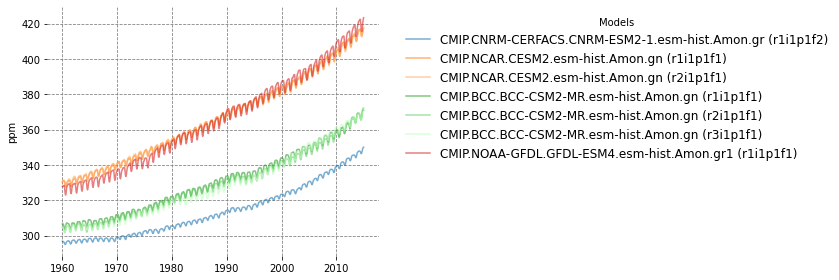

In [28]:
cmip_obj.lineplots()